In [1]:
%load_ext autoreload
%autoreload 2

import FNN_Train as FNN_Train
import torch
import numpy as np
import matplotlib.pyplot as plt


In [33]:
from Common.FSimDataset import FSimDataset

fnn_train = FNN_Train.FNN_Train()
fsDataset_train = FSimDataset(fnn_train.filePathH5, fnn_train.trnSet, 'T')
fsDataset_train.dataFile['C001']['block001']['Y']



*Use trainBatchSize: 20
*Use device: mps
*Use dropout: None


<HDF5 dataset "Y": shape (51,), type "<f8">

# Batch Size Experiment

See the last epoch $L_{\inf}$ Loss when batch size = 1, 10, 20 respectively

In [83]:
batchSizes = [1,10,20]
LInfLossTrain = {}
LInfLossTest = {}

LInfLossTrainMean = {}
LInfLossTestMean = {}
LInfLossTrainStd = {}
LInfLossTestStd = {}

for bs in batchSizes:
    fnn_train = FNN_Train.FNN_Train()
    fnn_train.train_batch_size = bs
    fnn_train.train()
    LInfLossTrain[bs] = fnn_train.res_trn_hist["T"]
    LInfLossTest[bs] = fnn_train.res_tst_hist["T"]
    assert len(LInfLossTrain[bs]) == len(LInfLossTest[bs]) == 50

for bs in batchSizes:
    LInfLossTrainMean[bs] = [np.mean(epoch) for epoch in LInfLossTrain[bs]]
    LInfLossTestMean[bs] = [np.mean(epoch) for epoch in LInfLossTest[bs]]
    LInfLossTrainStd[bs] = [np.std(epoch) for epoch in LInfLossTrain[bs]]
    LInfLossTestStd[bs] = [np.std(epoch) for epoch in LInfLossTest[bs]]



*Use trainBatchSize: 4
*Use device: mps
*Fields Models Will Be Trained with Epochs {'T': 50}.
Train from dict_T.pth
Initialize model weights
*Now we are training T field:
 >> Training T, epoch 1/50
 >> Training T, epoch 2/50
 >> Training T, epoch 3/50
 >> Training T, epoch 4/50
 >> Training T, epoch 5/50
 >> Training T, epoch 6/50
 >> Training T, epoch 7/50
 >> Training T, epoch 8/50
 >> Training T, epoch 9/50
 >> Training T, epoch 10/50
 >> Training T, epoch 11/50
 >> Training T, epoch 12/50
 >> Training T, epoch 13/50
 >> Training T, epoch 14/50
 >> Training T, epoch 15/50
 >> Training T, epoch 16/50
 >> Training T, epoch 17/50
 >> Training T, epoch 18/50
 >> Training T, epoch 19/50
 >> Training T, epoch 20/50
 >> Training T, epoch 21/50
 >> Training T, epoch 22/50
 >> Training T, epoch 23/50
 >> Training T, epoch 24/50
 >> Training T, epoch 25/50
 >> Training T, epoch 26/50
 >> Training T, epoch 27/50
 >> Training T, epoch 28/50
 >> Training T, epoch 29/50
 >> Training T, epoch 30/5

In [ ]:
for bs in batchSizes:
    LInfLossTrainMean[bs] = [np.mean(epoch) for epoch in LInfLossTrain[bs]]
    LInfLossTestMean[bs] = [np.mean(epoch) for epoch in LInfLossTest[bs]]
    LInfLossTrainStd[bs] = [np.std(epoch) for epoch in LInfLossTrain[bs]]
    LInfLossTestStd[bs] = [np.std(epoch) for epoch in LInfLossTest[bs]]



50

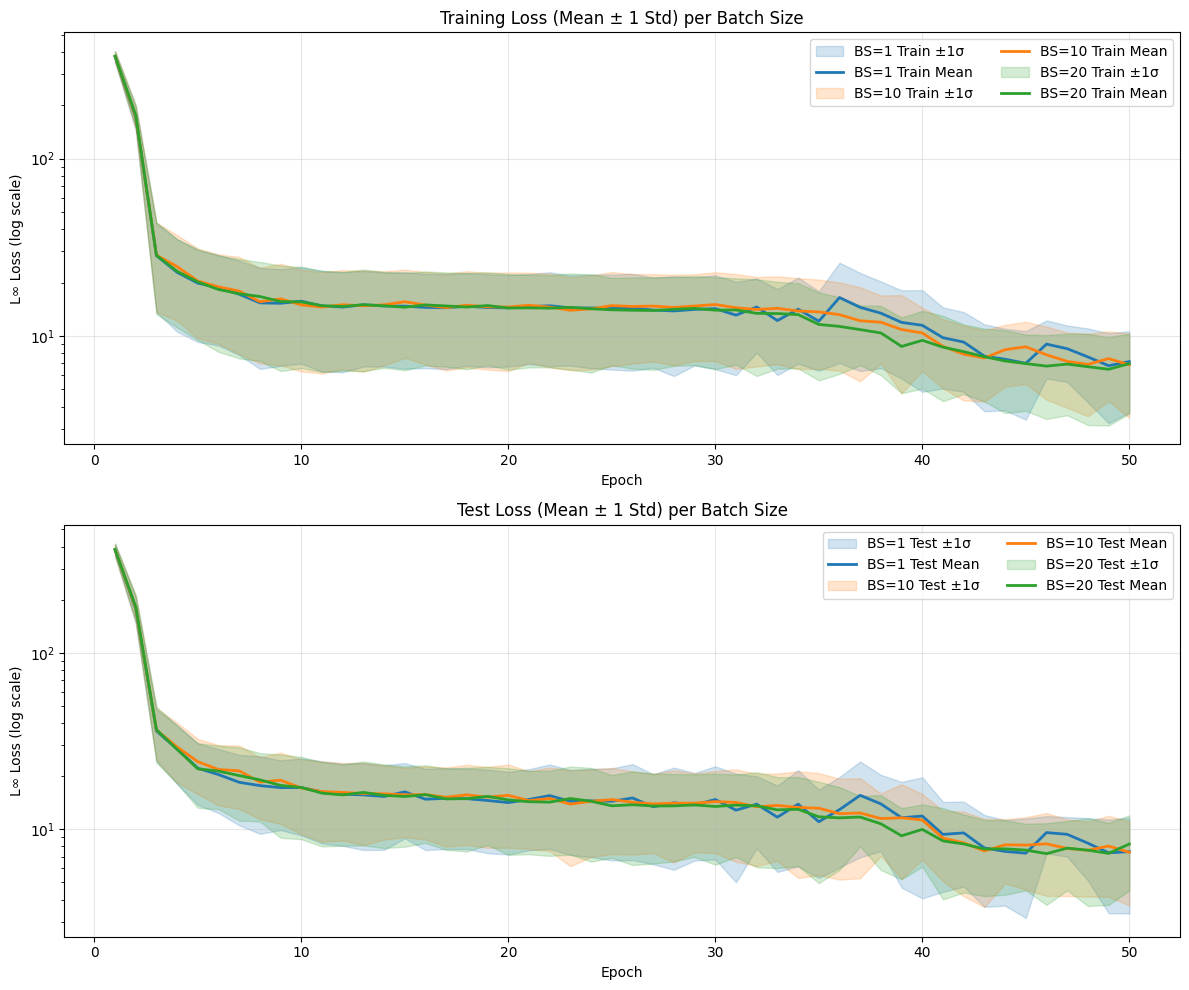

In [90]:

epochs = list(range(1, 51))
batchSizes = [1, 10, 20]  # Make sure this matches your data

# Choose distinct colors for each batch size
colors = {1: 'tab:blue', 10: 'tab:orange', 20: 'tab:green'}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# --- Training Loss ---
for i, bs in enumerate(batchSizes):
    # Only add label for the first batch size to avoid duplicate legends
    ax1.fill_between(
        epochs, 
        np.array(LInfLossTrainMean[bs]) - np.array(LInfLossTrainStd[bs]),
        np.array(LInfLossTrainMean[bs]) + np.array(LInfLossTrainStd[bs]),
        alpha=0.2, color=colors[bs], 
        label=f'BS={bs} Train ±1σ'
    )
    ax1.plot(
        epochs, LInfLossTrainMean[bs], '-', linewidth=2, color=colors[bs],
        label=f'BS={bs} Train Mean'
    )

ax1.set_yscale('log')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('L∞ Loss (log scale)')
ax1.set_title('Training Loss (Mean ± 1 Std) per Batch Size')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10, ncol=2)

# --- Test Loss ---
for i, bs in enumerate(batchSizes):
    ax2.fill_between(
        epochs, 
        np.array(LInfLossTestMean[bs]) - np.array(LInfLossTestStd[bs]),
        np.array(LInfLossTestMean[bs]) + np.array(LInfLossTestStd[bs]),
        alpha=0.2, color=colors[bs], 
        label=f'BS={bs} Test ±1σ'
    )
    ax2.plot(
        epochs, LInfLossTestMean[bs], '-', linewidth=2, color=colors[bs],
        label=f'BS={bs} Test Mean'
    )

ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('L∞ Loss (log scale)')
ax2.set_title('Test Loss (Mean ± 1 Std) per Batch Size')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=10, ncol=2)

plt.tight_layout()
plt.show()

In [ ]:

lInfLossTrainMax = [np.max(epoch) for epoch in lInfLossTrain]
lInfLossTestMax = [np.max(epoch) for epoch in lInfLossTest]

lInfLossTrainMean = [np.mean(epoch) for epoch in lInfLossTrain]
lInfLossTestMean = [np.mean(epoch) for epoch in lInfLossTest]

lInfLossTrainMin = [np.min(epoch) for epoch in lInfLossTrain]
lInfLossTestMin = [np.min(epoch) for epoch in lInfLossTest]

lInfLossTrainStd = [np.std(epoch) for epoch in lInfLossTrain]
lInfLossTestStd = [np.std(epoch) for epoch in lInfLossTest]

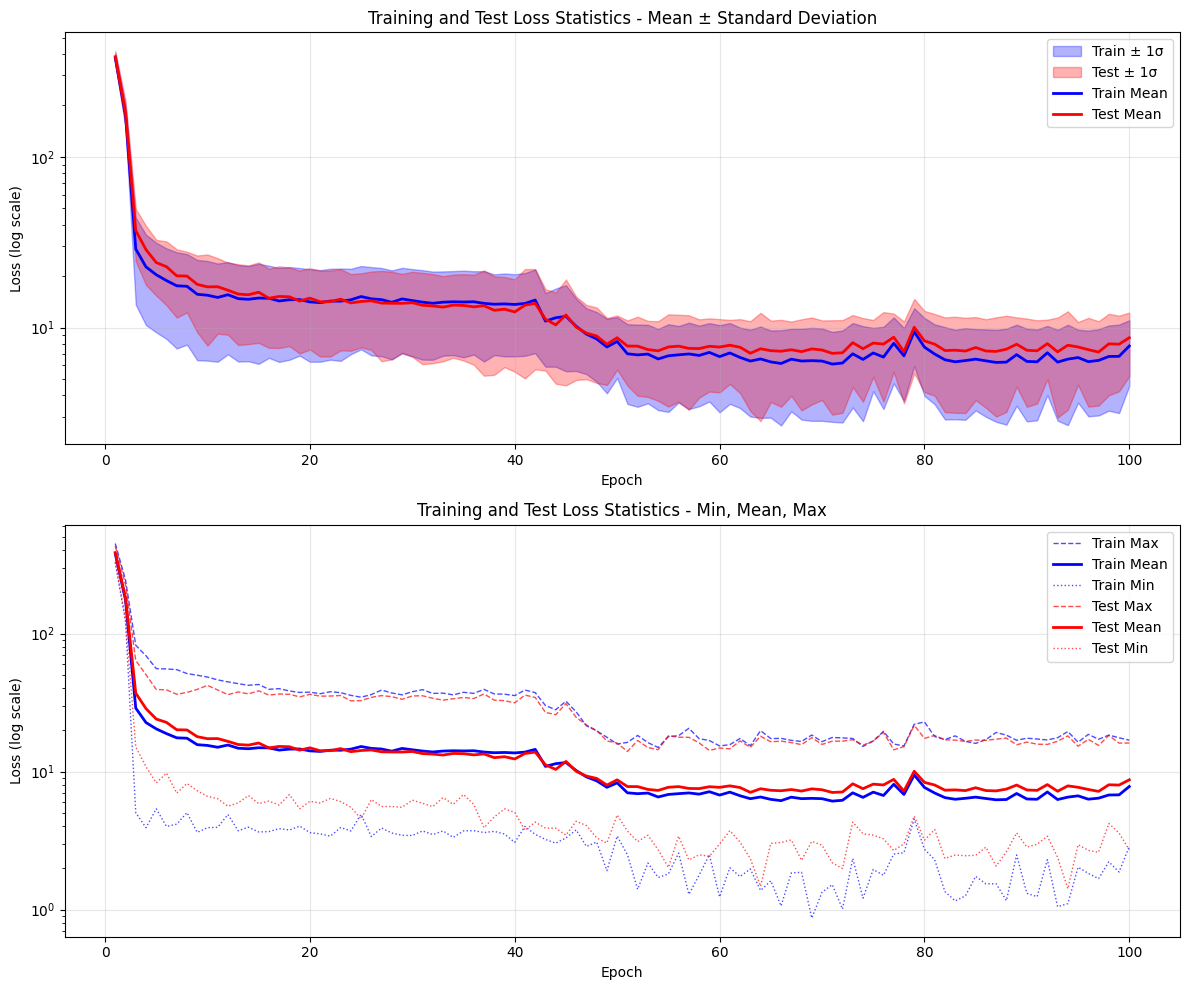

Final Training Loss - Mean: 7.795109, Std: 3.247324
Final Test Loss - Mean: 8.712977, Std: 3.527164
Training Loss Improvement: 97.95%
Test Loss Improvement: 97.74%


In [ ]:
import matplotlib.pyplot as plt


LInfLossTrainMax = {}
LInfLossTestMax = {}
LInfLossTrainMean = {}
LInfLossTestMean = {}
LInfLossTrainMin = {}
LInfLossTestMin = {}
LInfLossTrainStd = {}
LInfLossTestStd = {}

for bs in batchSizes:
    LInfLossTrainMax[bs] = np.max(LInfLossTrain[bs][-1])
    LInfLossTestMax[bs] = np.max(LInfLossTest[bs][-1])
    LInfLossTrainMean[bs] = np.mean(LInfLossTrain[bs][-1])
    LInfLossTestMean[bs] = np.mean(LInfLossTest[bs][-1])
    LInfLossTrainMin[bs] = np.min(LInfLossTrain[bs][-1])
    LInfLossTestMin[bs] = np.min(LInfLossTest[bs][-1])
    LInfLossTrainStd[bs] = np.std(LInfLossTrain[bs][-1])
    LInfLossTestStd[bs] = np.std(LInfLossTest[bs][-1])


# Create epoch numbers
epochs = list(range(1, len(lpLossTrain) + 1))

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Mean loss with standard deviation bands
ax1.fill_between(epochs, 
                 np.array(lpLossTrainMean) - np.array(lpLossTrainStd),
                 np.array(lpLossTrainMean) + np.array(lpLossTrainStd),
                 alpha=0.3, color='blue', label='Train ± 1σ')
ax1.fill_between(epochs, 
                 np.array(lpLossTestMean) - np.array(lpLossTestStd),
                 np.array(lpLossTestMean) + np.array(lpLossTestStd),
                 alpha=0.3, color='red', label='Test ± 1σ')

ax1.plot(epochs, lpLossTrainMean, 'b-', linewidth=2, label='Train Mean')
ax1.plot(epochs, lpLossTestMean, 'r-', linewidth=2, label='Test Mean')

ax1.set_yscale('log')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (log scale)')
ax1.set_title('Training and Test Loss Statistics - Mean ± Standard Deviation')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Min, Mean, Max comparison
ax2.plot(epochs, lpLossTrainMax, 'b--', linewidth=1, label='Train Max', alpha=0.7)
ax2.plot(epochs, lpLossTrainMean, 'b-', linewidth=2, label='Train Mean')
ax2.plot(epochs, lpLossTrainMin, 'b:', linewidth=1, label='Train Min', alpha=0.7)

ax2.plot(epochs, lpLossTestMax, 'r--', linewidth=1, label='Test Max', alpha=0.7)
ax2.plot(epochs, lpLossTestMean, 'r-', linewidth=2, label='Test Mean')
ax2.plot(epochs, lpLossTestMin, 'r:', linewidth=1, label='Test Min', alpha=0.7)

ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (log scale)')
ax2.set_title('Training and Test Loss Statistics - Min, Mean, Max')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some summary statistics
print(f"Final Training Loss - Mean: {lpLossTrainMean[-1]:.6f}, Std: {lpLossTrainStd[-1]:.6f}")
print(f"Final Test Loss - Mean: {lpLossTestMean[-1]:.6f}, Std: {lpLossTestStd[-1]:.6f}")
print(f"Training Loss Improvement: {(lpLossTrainMean[0] - lpLossTrainMean[-1]) / lpLossTrainMean[0] * 100:.2f}%")
print(f"Test Loss Improvement: {(lpLossTestMean[0] - lpLossTestMean[-1]) / lpLossTestMean[0] * 100:.2f}%")


In [33]:
max(lpLossTrain[-1])


np.float32(16.875061)